## Performed by: **Idriss Khattabi** and Supervised by: **AACHAK Lotfi**

# Lab 2
--------------
## **Objective** : The main purpose behind this lab is to get familiar with NLP Rule based, Regex and NLP Word embedding.

## Part 1: Rule Based NLP and Regex

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

words_to_int = {"one": 1, "three": 3, "four": 4}

# Define my custom stopwords
custom_stopwords = {"dollar", "kilos", "dollar.", "fresh"}

def text_processing(text):
    # convert to lowercases
    text = text.lower()

    # replace teh string number with intiger number
    words = text.split()
    replaced_text = ""
    for word in words:
        if word in words_to_int:
            replaced_text += str(words_to_int[word]) + " "
        else:
            replaced_text += word + " "

    text = replaced_text.strip()

    # remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_text = [word for word in words if word not in stop_words]
    # remove my custom stopwords
    filtered_text = [word for word in filtered_text if word not in custom_stopwords]
    return ' '.join(filtered_text)

def generate_bill(text):

    # Splitting the text based on commas and "and"
    splited_text = re.split(r'\w*,\s+| and ', text)

    print("Splited text:", splited_text)

    cleaned_splited_text = [text_processing(split) for split in splited_text]
    print("cleaned_splited_text : ", cleaned_splited_text)

    print("\nProduct\t\t\tQuantity\tUnit Price\tTotal Price")
    total_cost = 0

    for sentence in cleaned_splited_text:
        match = re.search(r'(\d+)\s+(\w+\s*\w*)\s+(\d+[,.]?\d*)\s*', sentence)
        if match:
            quantity, product, unit_price = match.groups()
            total_price = float(quantity) * float(unit_price.replace(',', '.'))
            total_cost += total_price
            print(f"{product.ljust(25, " ")}{quantity.ljust(12, " ")}\t{unit_price.ljust(12, " ")}\t{total_price:.2f}")

    print(f"\nTotal Cost: {total_cost:.2f} dollars")

# Example usage
text = "I bought three Samsung smartphones 150 $ each, four kilos of fresh banana for 1,2 dollar a kilogram and one Hamburger with 4,5 dollar."
generate_bill(text)


Splited text: ['I bought three Samsung smartphones 150 $ ', 'four kilos of fresh banana for 1,2 dollar a kilogram', 'one Hamburger with 4,5 dollar.']
cleaned_splited_text :  ['bought 3 samsung smartphones 150 $', '4 banana 1,2 kilogram', '1 hamburger 4,5']

Product			Quantity	Unit Price	Total Price
samsung smartphones      3           	150         	450.00
banana                   4           	1,2         	4.80
hamburger                1           	4,5         	4.50

Total Cost: 459.30 dollars


## Part 2 : word Embedding

In [1]:
from pymongo import MongoClient
import pandas as pd
import numpy as np

In [2]:
# First, load the data from MongoDB

# Connect to MongoDB server
client = MongoClient('mongodb://localhost:27017/')

# Select the database
db = client['NLP_DB1']

# Select the collection
collection = db['cleaned_hespress_posts']

projection = {'_id': 0, 'cleaned_posts': 1}

# Query the collection to retrieve documents
all_posts = collection.find({}, projection)

# Convert the data to pandas's DataFrame
all_posts = pd.DataFrame(list(all_posts))

all_posts.head()

,cleaned_posts
0,ﺿﻤﻦ ﺍﻟﺘﻘﺮﻳﺮ ﺗﺴﻠﻤﻪ ﻋﺰﻳﺰ ﺃﺧﻨﻮﺵ، ﺭﺋﻴﺲ ﺍﻟﺤﻜﻮﻣﺔ، ﻧﻬ...
1,ﻳﺘﺠﺪﺩ ﺍﻟﻨﻘﺎﺵ ﺃﻭﺳﺎﻁ ﺍﻟﻤﻬﺘﻤﻴﻦ ﺑﺸﺆﻭﻥ ﺍﻟﻤﺮﺃﺓ ﻭﺣﻘﻮﻗ...
2,ﺃﻋﻠﻦ ﺷﻜﻴﺐ ﺑﻨﻤﻮﺳﻰ، ﻭﺯﻳﺮ ﺍﻟﺘﺮﺑﻴﺔ ﺍﻟﻮﻃﻨﻴﺔ ﻭﺍﻟﺘﻌﻠﻴ...
3,ﺗﺘﺠﻪ ﺃﻧﻈﺎﺭ ﺷﺒﻜﺎﺕ ﺍﻟﻬﺠﺮﺓ ﺍﻟﺴﺮﻳﺔ ﺑﺎﻟﻤﻐﺮﺏ ﻣﻮﻋﺪ ﻋﻴ...
4,ﺗﻮﺻﻠﺖ ﺟﺮﻳﺪﺓ ﻫﺴﺒﺮﻳﺲ ﺍﻹﻟﻜﺘﺮﻭﻧﻴﺔ ﺑﺮﺩ ﺟﻤﻌﻴﺔ ﺍﻷﻋﻤﺎﻝ...


In [18]:
from nltk.tokenize import word_tokenize

In [22]:
post_tokens = []

# tokenize each text
for i in range(len(all_posts)):
    tokens = word_tokenize(all_posts["cleaned_data"][i])
    post_tokens.append(tokens)

all_posts["tokens"] = post_tokens

### I alredy apply on this data : cleaning the text, tokenization, Remove stop words, normalize the text and Lemmatization, from the lab 1.

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
post_tokens = []

# tokenize each text
for i in range(len(all_posts)):
    tokens = word_tokenize(all_posts["cleaned_posts"][i])
    post_tokens.append(tokens)

all_posts["tokens"] = post_tokens

In [ ]:
all_posts.head()

,cleaned_posts,tokens
0,ﺿﻤﻦ ﺍﻟﺘﻘﺮﻳﺮ ﺗﺴﻠﻤﻪ ﻋﺰﻳﺰ ﺃﺧﻨﻮﺵ، ﺭﺋﻴﺲ ﺍﻟﺤﻜﻮﻣﺔ، ﻧﻬ...,"[ﺿﻤﻦ, ﺍﻟﺘﻘﺮﻳﺮ, ﺗﺴﻠﻤﻪ, ﻋﺰﻳﺰ, ﺃﺧﻨﻮﺵ،, ﺭﺋﻴﺲ, ﺍﻟﺤﻜ..."
1,ﻳﺘﺠﺪﺩ ﺍﻟﻨﻘﺎﺵ ﺃﻭﺳﺎﻁ ﺍﻟﻤﻬﺘﻤﻴﻦ ﺑﺸﺆﻭﻥ ﺍﻟﻤﺮﺃﺓ ﻭﺣﻘﻮﻗ...,"[ﻳﺘﺠﺪﺩ, ﺍﻟﻨﻘﺎﺵ, ﺃﻭﺳﺎﻁ, ﺍﻟﻤﻬﺘﻤﻴﻦ, ﺑﺸﺆﻭﻥ, ﺍﻟﻤﺮﺃﺓ..."
2,ﺃﻋﻠﻦ ﺷﻜﻴﺐ ﺑﻨﻤﻮﺳﻰ، ﻭﺯﻳﺮ ﺍﻟﺘﺮﺑﻴﺔ ﺍﻟﻮﻃﻨﻴﺔ ﻭﺍﻟﺘﻌﻠﻴ...,"[ﺃﻋﻠﻦ, ﺷﻜﻴﺐ, ﺑﻨﻤﻮﺳﻰ،, ﻭﺯﻳﺮ, ﺍﻟﺘﺮﺑﻴﺔ, ﺍﻟﻮﻃﻨﻴﺔ, ..."
3,ﺗﺘﺠﻪ ﺃﻧﻈﺎﺭ ﺷﺒﻜﺎﺕ ﺍﻟﻬﺠﺮﺓ ﺍﻟﺴﺮﻳﺔ ﺑﺎﻟﻤﻐﺮﺏ ﻣﻮﻋﺪ ﻋﻴ...,"[ﺗﺘﺠﻪ, ﺃﻧﻈﺎﺭ, ﺷﺒﻜﺎﺕ, ﺍﻟﻬﺠﺮﺓ, ﺍﻟﺴﺮﻳﺔ, ﺑﺎﻟﻤﻐﺮﺏ, ..."
4,ﺗﻮﺻﻠﺖ ﺟﺮﻳﺪﺓ ﻫﺴﺒﺮﻳﺲ ﺍﻹﻟﻜﺘﺮﻭﻧﻴﺔ ﺑﺮﺩ ﺟﻤﻌﻴﺔ ﺍﻷﻋﻤﺎﻝ...,"[ﺗﻮﺻﻠﺖ, ﺟﺮﻳﺪﺓ, ﻫﺴﺒﺮﻳﺲ, ﺍﻹﻟﻜﺘﺮﻭﻧﻴﺔ, ﺑﺮﺩ, ﺟﻤﻌﻴﺔ,..."


In [ ]:
print(post_tokens[0][:50])

['ﺿﻤﻦ', 'ﺍﻟﺘﻘﺮﻳﺮ', 'ﺗﺴﻠﻤﻪ', 'ﻋﺰﻳﺰ', 'ﺃﺧﻨﻮﺵ،', 'ﺭﺋﻴﺲ', 'ﺍﻟﺤﻜﻮﻣﺔ،', 'ﻧﻬﺎﻳﺔ', 'ﺷﻬﺮ', 'ﺍﻟﻤﺎﺿﻲ،', 'ﺍﻟﻬﻴﺌﺔ', 'ﺍﻟﻤﻜﻠﻔﺔ', 'ﺑﻤﺮﺍﺟﻌﺔ', 'ﻣﺪﻭﻧﺔ', 'ﺍﻷﺳﺮﺓ،', 'ﺍﻟﻤﻘﺮﺭ', 'ﺭﻓﻌﻪ', 'ﺍﻟﻤﻠﻚ', 'ﻣﺤﻤﺪ', 'ﺍﻟﺴﺎﺩﺱ،', 'ﻻﻓﺘﺎ', 'ﻭﺟﻮﺩ', 'ﻣﻘﺘﺮﺡ', 'ﺗﻄﺮﻕ', 'ﺗﻘﺴﻴﻢ', 'ﺍﻟﺘﺮﻛﺔ', 'ﺧﻼﻝ', 'ﺗﺨﻮﻳﻞ', 'ﺻﺎﺣﺐ', 'ﺍﻟﻤﺎﻝ', 'ﻭﺍﻷﺻﻮﻝ', 'ﺳﻠﻄﺔ', 'ﺍﺧﺘﻴﺎﺭ', 'ﺍﻟﻨﻈﺎﻡ', 'ﺍﻟﻤﻄﺒﻖ،', 'ﺍﻟﻤﻴﺮﺍﺙ', 'ﺍﻟﻮﺻﻴﺔ،', 'ﺗﻮﺳﻴﻊ', 'ﻧﻄﺎﻕ', 'ﺍﻷﺧﻴﺮﺓ', 'ﻟﺘﺸﻤﻞ', 'ﺍﻷﺣﻔﺎﺩ', 'ﻭﺭﻓﻊ', 'ﺍﻟﻘﻴﻮﺩ', 'ﺍﻟﻤﻔﺮﻭﺿﺔ', 'ﻋﻠﻴﻬﺎ', 'ﻭﻋﻠﻰ', 'ﺍﻟﺮﻏﻢ', 'ﺍﻟﻤﻘﺘﺮﺡ،', 'ﻋﺪﻩ']


### 1. Apply one hot encoding, bag of words, TF-IDF technics on the Data vectors collected during the lab 1.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#### 1. One-Hot Encoding:

* test :

In [ ]:
test_tokens = ['ﺿﻤﻦ', 'ﺍﻟﺘﻘﺮﻳﺮ', 'ﺗﺴﻠﻤﻪ', 'ﻋﺰﻳﺰ', 'ﺃﺧﻨﻮﺵ،', 'ﺭﺋﻴﺲ', 'ﺍﻟﺤﻜﻮﻣﺔ،']

token_indices2 = {token: i for i, token in enumerate(set(test_tokens))}
encoded_tokens2 = [[token_indices2[token]] for token in test_tokens]
encoded_tokens_array2 = np.array(encoded_tokens2)
encoded_tokens_array2 = encoded_tokens_array2.reshape(-1, 1)
encoder2 = OneHotEncoder()
one_hot_encoded2 = encoder2.fit_transform(encoded_tokens_array2).toarray()
for token, encoded in zip(test_tokens, one_hot_encoded2):
    print(f"{token} : {encoded}")

ﺿﻤﻦ : [0. 0. 0. 0. 0. 1. 0.]
ﺍﻟﺘﻘﺮﻳﺮ : [0. 0. 0. 0. 1. 0. 0.]
ﺗﺴﻠﻤﻪ : [0. 0. 1. 0. 0. 0. 0.]
ﻋﺰﻳﺰ : [0. 0. 0. 0. 0. 0. 1.]
ﺃﺧﻨﻮﺵ، : [0. 0. 0. 1. 0. 0. 0.]
ﺭﺋﻴﺲ : [0. 1. 0. 0. 0. 0. 0.]
ﺍﻟﺤﻜﻮﻣﺔ، : [1. 0. 0. 0. 0. 0. 0.]


* apply on real data :

In [ ]:
all_one_hot_encoded = []

# tokenize each text
for i in range(len(all_posts["tokens"])):

    tokens = all_posts["tokens"][i]

    # Convert tokens to indices
    token_indices = {token: i for i, token in enumerate(set(tokens))}
    encoded_tokens = [[token_indices[token]] for token in tokens]

    # Convert the 2D list into a 2D NumPy array
    encoded_tokens_array = np.array(encoded_tokens)

    # Reshape the array to be 2D
    encoded_tokens_array = encoded_tokens_array.reshape(-1, 1)

    # Apply one-hot encoding
    encoder = OneHotEncoder()
    one_hot_encoded = encoder.fit_transform(encoded_tokens_array).toarray()
    all_one_hot_encoded.append(one_hot_encoded)

# display the encodage of the first 5 tokens
print("display the encodage (One-Hot Encoded) of the first '3' tokens : ")
for token, encoded in zip(post_tokens[0][:3], all_one_hot_encoded[0][:3]):
    print(f"{token}: {encoded}")

display the encodage (One-Hot Encoded) of the first '3' tokens : 
ﺿﻤﻦ: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

#### 2. Bag of Words:

* test :

In [ ]:
test_tokens = ['ﺿﻤﻦ', 'ﺍﻟﺘﻘﺮﻳﺮ', 'ﺗﺴﻠﻤﻪ', 'ﻋﺰﻳﺰ', 'ﺃﺧﻨﻮﺵ', 'ﺭﺋﻴﺲ', 'ﺍﻟﺤﻜﻮﻣﺔ', 'ﺍﻟﺤﻜﻮﻣﺔ', 'ﺭﺋﻴﺲ']

text = " ".join(test_tokens)
# Apply Bag of Words
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform([text]).toarray()

print("\nBag of Words:")
for token, count in zip(test_tokens, bag_of_words[0]):
    print(f"{token}: {count}")


Bag of Words:
ﺿﻤﻦ: 1
ﺍﻟﺘﻘﺮﻳﺮ: 1
ﺗﺴﻠﻤﻪ: 2
ﻋﺰﻳﺰ: 1
ﺃﺧﻨﻮﺵ: 2
ﺭﺋﻴﺲ: 1
ﺍﻟﺤﻜﻮﻣﺔ: 1


* apply on real data :

In [ ]:
all_bag_words = []

# tokenize each text
for i in range(len(all_posts["tokens"])):
    # Convert tokens to a single string
    text = " ".join(all_posts["tokens"][i])

    # Apply Bag of Words
    vectorizer = CountVectorizer()
    bag_of_words = vectorizer.fit_transform([text]).toarray()

    all_bag_words.append(bag_of_words)

# display the Bag of Words of the first 100 tokens
print("display the encodage (Bag of Words) of the first '100' tokens : ")
for token, count in zip(all_posts["tokens"][0][:100], bag_of_words[0][:100]):
    print(f"{token}: {count}", end=" || ")

display the encodage (Bag of Words) of the first '100' tokens : 
ﺿﻤﻦ: 1 || ﺍﻟﺘﻘﺮﻳﺮ: 1 || ﺗﺴﻠﻤﻪ: 1 || ﻋﺰﻳﺰ: 1 || ﺃﺧﻨﻮﺵ،: 1 || ﺭﺋﻴﺲ: 1 || ﺍﻟﺤﻜﻮﻣﺔ،: 2 || ﻧﻬﺎﻳﺔ: 1 || ﺷﻬﺮ: 1 || ﺍﻟﻤﺎﺿﻲ،: 1 || ﺍﻟﻬﻴﺌﺔ: 1 || ﺍﻟﻤﻜﻠﻔﺔ: 1 || ﺑﻤﺮﺍﺟﻌﺔ: 2 || ﻣﺪﻭﻧﺔ: 1 || ﺍﻷﺳﺮﺓ،: 2 || ﺍﻟﻤﻘﺮﺭ: 3 || ﺭﻓﻌﻪ: 1 || ﺍﻟﻤﻠﻚ: 1 || ﻣﺤﻤﺪ: 1 || ﺍﻟﺴﺎﺩﺱ،: 1 || ﻻﻓﺘﺎ: 1 || ﻭﺟﻮﺩ: 1 || ﻣﻘﺘﺮﺡ: 1 || ﺗﻄﺮﻕ: 2 || ﺗﻘﺴﻴﻢ: 1 || ﺍﻟﺘﺮﻛﺔ: 1 || ﺧﻼﻝ: 1 || ﺗﺨﻮﻳﻞ: 1 || ﺻﺎﺣﺐ: 1 || ﺍﻟﻤﺎﻝ: 1 || ﻭﺍﻷﺻﻮﻝ: 1 || ﺳﻠﻄﺔ: 1 || ﺍﺧﺘﻴﺎﺭ: 3 || ﺍﻟﻨﻈﺎﻡ: 1 || ﺍﻟﻤﻄﺒﻖ،: 1 || ﺍﻟﻤﻴﺮﺍﺙ: 1 || ﺍﻟﻮﺻﻴﺔ،: 1 || ﺗﻮﺳﻴﻊ: 1 || ﻧﻄﺎﻕ: 3 || ﺍﻷﺧﻴﺮﺓ: 1 || ﻟﺘﺸﻤﻞ: 1 || ﺍﻷﺣﻔﺎﺩ: 1 || ﻭﺭﻓﻊ: 1 || ﺍﻟﻘﻴﻮﺩ: 1 || ﺍﻟﻤﻔﺮﻭﺿﺔ: 1 || ﻋﻠﻴﻬﺎ: 9 || ﻭﻋﻠﻰ: 1 || ﺍﻟﺮﻏﻢ: 1 || ﺍﻟﻤﻘﺘﺮﺡ،: 1 || ﻋﺪﻩ: 1 || ﻛﺜﻴﺮﻭﻥ: 1 || ﺗﺴﺮﻳﺒﺎ،: 1 || ﻋﻤﻮﻣﺎ: 1 || ﻭﺛﻴﻘﺔ: 3 || ﺭﺍﺋﺠﺔ: 1 || ﻳﺘﺼﻞ: 1 || ﺑﺘﻮﺻﻴﺎﺕ: 1 || ﺭﺳﻤﻴﺔ: 2 || ﻣﺮﻓﻮﻋﺔ: 1 || ﺍﻟﻤﻠﻚ: 1 || ﻣﺤﻤﺪ: 1 || ﺍﻟﺴﺎﺩﺱ؛: 1 || ﺟﻬﺎﺕ: 1 || ﻛﺜﻴﺮﺓ: 1 || ﺍﻟﺘﻘﻄﺘﻪ،: 1 || ﺧﺼﻮﺻﺎ: 1 || ﺍﻷﻗﻠﻴﺎﺕ: 1 || ﺍﻟﺪﻳﻨﻴﺔ: 1 || ﺑﺎﻟﻤﻐﺮﺏ،: 1 || ﻭﻧﻈﺮﺕ: 1 || ﺇﻟﻴﻪ: 1 || ﺑـﺘﻘﺪﻳﺮ: 1 || ﻛـﺤﻞ: 1 || ﺑﺮﺍﻏﻤﺎﺗﻲ: 1 || ﻳﺴﺎﻋﺪ: 1 || ﺗ

#### 3. TF-IDF (Term Frequency-Inverse Document Frequency):

* Test :

In [ ]:
test_tokens = ['ﺿﻤﻦ', 'ﺍﻟﺘﻘﺮﻳﺮ', 'ﺗﺴﻠﻤﻪ', 'ﻋﺰﻳﺰ', 'ﺃﺧﻨﻮﺵ', 'ﺭﺋﻴﺲ', 'ﺍﻟﺤﻜﻮﻣﺔ', 'ﺍﻟﺤﻜﻮﻣﺔ', 'ﺭﺋﻴﺲ']
text = " ".join(test_tokens)
# Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform([text]).toarray()

print("\nTF-IDF:")
for token, score in zip(test_tokens, tfidf[0]):
    print(f"{token}: {score:.2f}")



TF-IDF:
ﺿﻤﻦ: 0.28
ﺍﻟﺘﻘﺮﻳﺮ: 0.28
ﺗﺴﻠﻤﻪ: 0.55
ﻋﺰﻳﺰ: 0.28
ﺃﺧﻨﻮﺵ: 0.55
ﺭﺋﻴﺲ: 0.28
ﺍﻟﺤﻜﻮﻣﺔ: 0.28


* apply on real data :

In [ ]:
all_tf_idf = []

for i in range(len(all_posts["tokens"])):
    # Convert tokens to a single string
    text = " ".join(all_posts["tokens"][i])
    # Apply TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    tfidf = tfidf_vectorizer.fit_transform([text]).toarray()
    all_tf_idf.append(tfidf)

# display the score of TF-IDF of the first 100 tokens
print("display the score of TF-IDF of the first '100' tokens : ")
for token, score in zip(all_posts["tokens"][0][:100], tfidf[0][:100]):
    print(f"{token}: {score:.2f}", end=" || ")

display the score of TF-IDF of the first '100' tokens : 
ﺿﻤﻦ: 0.05 || ﺍﻟﺘﻘﺮﻳﺮ: 0.05 || ﺗﺴﻠﻤﻪ: 0.05 || ﻋﺰﻳﺰ: 0.05 || ﺃﺧﻨﻮﺵ،: 0.05 || ﺭﺋﻴﺲ: 0.05 || ﺍﻟﺤﻜﻮﻣﺔ،: 0.10 || ﻧﻬﺎﻳﺔ: 0.05 || ﺷﻬﺮ: 0.05 || ﺍﻟﻤﺎﺿﻲ،: 0.05 || ﺍﻟﻬﻴﺌﺔ: 0.05 || ﺍﻟﻤﻜﻠﻔﺔ: 0.05 || ﺑﻤﺮﺍﺟﻌﺔ: 0.10 || ﻣﺪﻭﻧﺔ: 0.05 || ﺍﻷﺳﺮﺓ،: 0.10 || ﺍﻟﻤﻘﺮﺭ: 0.15 || ﺭﻓﻌﻪ: 0.05 || ﺍﻟﻤﻠﻚ: 0.05 || ﻣﺤﻤﺪ: 0.05 || ﺍﻟﺴﺎﺩﺱ،: 0.05 || ﻻﻓﺘﺎ: 0.05 || ﻭﺟﻮﺩ: 0.05 || ﻣﻘﺘﺮﺡ: 0.05 || ﺗﻄﺮﻕ: 0.10 || ﺗﻘﺴﻴﻢ: 0.05 || ﺍﻟﺘﺮﻛﺔ: 0.05 || ﺧﻼﻝ: 0.05 || ﺗﺨﻮﻳﻞ: 0.05 || ﺻﺎﺣﺐ: 0.05 || ﺍﻟﻤﺎﻝ: 0.05 || ﻭﺍﻷﺻﻮﻝ: 0.05 || ﺳﻠﻄﺔ: 0.05 || ﺍﺧﺘﻴﺎﺭ: 0.15 || ﺍﻟﻨﻈﺎﻡ: 0.05 || ﺍﻟﻤﻄﺒﻖ،: 0.05 || ﺍﻟﻤﻴﺮﺍﺙ: 0.05 || ﺍﻟﻮﺻﻴﺔ،: 0.05 || ﺗﻮﺳﻴﻊ: 0.05 || ﻧﻄﺎﻕ: 0.15 || ﺍﻷﺧﻴﺮﺓ: 0.05 || ﻟﺘﺸﻤﻞ: 0.05 || ﺍﻷﺣﻔﺎﺩ: 0.05 || ﻭﺭﻓﻊ: 0.05 || ﺍﻟﻘﻴﻮﺩ: 0.05 || ﺍﻟﻤﻔﺮﻭﺿﺔ: 0.05 || ﻋﻠﻴﻬﺎ: 0.45 || ﻭﻋﻠﻰ: 0.05 || ﺍﻟﺮﻏﻢ: 0.05 || ﺍﻟﻤﻘﺘﺮﺡ،: 0.05 || ﻋﺪﻩ: 0.05 || ﻛﺜﻴﺮﻭﻥ: 0.05 || ﺗﺴﺮﻳﺒﺎ،: 0.05 || ﻋﻤﻮﻣﺎ: 0.05 || ﻭﺛﻴﻘﺔ: 0.15 || ﺭﺍﺋﺠﺔ: 0.05 || ﻳﺘﺼﻞ: 0.05 || ﺑﺘﻮﺻﻴﺎﺕ: 0.05 || ﺭﺳﻤﻴﺔ: 0.10 || ﻣﺮﻓﻮﻋﺔ: 0.05 || ﺍﻟﻤﻠﻚ: 0.05 || ﻣﺤﻤﺪ: 0.05 || ﺍﻟﺴﺎﺩﺱ؛:

### 2. Apply one Word2Vec Approach (Skip Gram, CBOW) on the same DataSet :

* Example / test :

In [40]:
from gensim.models import Word2Vec

# Example Arabic tokens
arabic_tokens = [["كان", "الطقس", "حاراً", "في", "الصيف", "و", "بارداً", "في", "الشتاء"]]

# Train Word2Vec model (Skip-gram)
model_skipgram_test = Word2Vec(sentences=arabic_tokens, vector_size=100, window=5, sg=1, min_count=1)

# Train Word2Vec model (CBOW)
model_cbow_test = Word2Vec(sentences=arabic_tokens, vector_size=100, window=5, sg=0, min_count=1)

# Get vector representation of a word
word_vector1 = model_skipgram_test.wv.get_vector("كان")

# Find similar words
similar_words1 = model_skipgram_test.wv.most_similar("كان")

print("Word vector:", word_vector1)
print("Similar words:", similar_words1)

print("*"*50)

# Get vector representation of a word using CBOW model
word_vector_cbow1 = model_cbow_test.wv.get_vector("كان")

# Find similar words using CBOW model
similar_words_cbow1 = model_cbow_test.wv.most_similar("كان")

print("Word vector (CBOW):", word_vector_cbow1)
print("Similar words (CBOW):", similar_words_cbow1)


Word vector: [ 8.1681199e-03 -4.4430327e-03  8.9854337e-03  8.2536647e-03
 -4.4352221e-03  3.0310510e-04  4.2744912e-03 -3.9263200e-03
 -5.5599655e-03 -6.5123225e-03 -6.7073823e-04 -2.9592158e-04
  4.4630850e-03 -2.4740540e-03 -1.7260908e-04  2.4618758e-03
  4.8675989e-03 -3.0808449e-05 -6.3394094e-03 -9.2608072e-03
  2.6657581e-05  6.6618943e-03  1.4660227e-03 -8.9665223e-03
 -7.9386048e-03  6.5519023e-03 -3.7856805e-03  6.2549924e-03
 -6.6810320e-03  8.4796622e-03 -6.5163244e-03  3.2880199e-03
 -1.0569858e-03 -6.7875278e-03 -3.2875966e-03 -1.1614120e-03
 -5.4709399e-03 -1.2113475e-03 -7.5633135e-03  2.6466595e-03
  9.0701487e-03 -2.3772502e-03 -9.7651005e-04  3.5135616e-03
  8.6650876e-03 -5.9218528e-03 -6.8875779e-03 -2.9329848e-03
  9.1476962e-03  8.6626766e-04 -8.6784009e-03 -1.4469790e-03
  9.4794659e-03 -7.5494875e-03 -5.3580985e-03  9.3165627e-03
 -8.9737261e-03  3.8259076e-03  6.6544057e-04  6.6607012e-03
  8.3127534e-03 -2.8507852e-03 -3.9923131e-03  8.8979173e-03
  2.0896459

* apply on real data :

In [37]:

tokens = [all_posts["tokens"][0]]

# Train Word2Vec model (Skip-gram)
model_skipgram = Word2Vec(sentences=tokens, vector_size=100, window=5, sg=1, min_count=1)

# Train Word2Vec model (CBOW)
model_cbow = Word2Vec(sentences=tokens, vector_size=100, window=5, sg=0, min_count=1)


tokens :  [['ﺿﻤﻦ', 'ﺍﻟﺘﻘﺮﻳﺮ', 'ﺗﺴﻠﻤﻪ', 'ﻋﺰﻳﺰ', 'ﺃﺧﻨﻮﺵ،', 'ﺭﺋﻴﺲ', 'ﺍﻟﺤﻜﻮﻣﺔ،', 'ﻧﻬﺎﻳﺔ', 'ﺷﻬﺮ', 'ﺍﻟﻤﺎﺿﻲ،', 'ﺍﻟﻬﻴﺌﺔ', 'ﺍﻟﻤﻜﻠﻔﺔ', 'ﺑﻤﺮﺍﺟﻌﺔ', 'ﻣﺪﻭﻧﺔ', 'ﺍﻷﺳﺮﺓ،', 'ﺍﻟﻤﻘﺮﺭ', 'ﺭﻓﻌﻪ', 'ﺍﻟﻤﻠﻚ', 'ﻣﺤﻤﺪ', 'ﺍﻟﺴﺎﺩﺱ،', 'ﻻﻓﺘﺎ', 'ﻭﺟﻮﺩ', 'ﻣﻘﺘﺮﺡ', 'ﺗﻄﺮﻕ', 'ﺗﻘﺴﻴﻢ', 'ﺍﻟﺘﺮﻛﺔ', 'ﺧﻼﻝ', 'ﺗﺨﻮﻳﻞ', 'ﺻﺎﺣﺐ', 'ﺍﻟﻤﺎﻝ', 'ﻭﺍﻷﺻﻮﻝ', 'ﺳﻠﻄﺔ', 'ﺍﺧﺘﻴﺎﺭ', 'ﺍﻟﻨﻈﺎﻡ', 'ﺍﻟﻤﻄﺒﻖ،', 'ﺍﻟﻤﻴﺮﺍﺙ', 'ﺍﻟﻮﺻﻴﺔ،', 'ﺗﻮﺳﻴﻊ', 'ﻧﻄﺎﻕ', 'ﺍﻷﺧﻴﺮﺓ', 'ﻟﺘﺸﻤﻞ', 'ﺍﻷﺣﻔﺎﺩ', 'ﻭﺭﻓﻊ', 'ﺍﻟﻘﻴﻮﺩ', 'ﺍﻟﻤﻔﺮﻭﺿﺔ', 'ﻋﻠﻴﻬﺎ', 'ﻭﻋﻠﻰ', 'ﺍﻟﺮﻏﻢ', 'ﺍﻟﻤﻘﺘﺮﺡ،', 'ﻋﺪﻩ', 'ﻛﺜﻴﺮﻭﻥ', 'ﺗﺴﺮﻳﺒﺎ،', 'ﻋﻤﻮﻣﺎ', 'ﻭﺛﻴﻘﺔ', 'ﺭﺍﺋﺠﺔ', 'ﻳﺘﺼﻞ', 'ﺑﺘﻮﺻﻴﺎﺕ', 'ﺭﺳﻤﻴﺔ', 'ﻣﺮﻓﻮﻋﺔ', 'ﺍﻟﻤﻠﻚ', 'ﻣﺤﻤﺪ', 'ﺍﻟﺴﺎﺩﺱ؛', 'ﺟﻬﺎﺕ', 'ﻛﺜﻴﺮﺓ', 'ﺍﻟﺘﻘﻄﺘﻪ،', 'ﺧﺼﻮﺻﺎ', 'ﺍﻷﻗﻠﻴﺎﺕ', 'ﺍﻟﺪﻳﻨﻴﺔ', 'ﺑﺎﻟﻤﻐﺮﺏ،', 'ﻭﻧﻈﺮﺕ', 'ﺇﻟﻴﻪ', 'ﺑـﺘﻘﺪﻳﺮ', 'ﻛـﺤﻞ', 'ﺑﺮﺍﻏﻤﺎﺗﻲ', 'ﻳﺴﺎﻋﺪ', 'ﺗﻘﺴﻴﻢ', 'ﺍﻟﺘﺮﻛﺎﺕ', 'ﻭﻓﻖ', 'ﻣﻨﻄﻖ', 'ﺍﻟﻮﺻﻴﺔ،', 'ﻭﺗﻤﻜﻴﻦ', 'ﺍﻟﻤﻐﺎﺭﺑﺔ', 'ﺍﺧﺘﻴﺎﺭ', 'ﻳﻨﺎﺳﺐ', 'ﺷﻜﻞ', 'ﻋﻴﺸﻬﻢ', 'ﺍﻟﺪﻳﻦ', 'ﻭﺍﻟﻘﺎﻧﻮﻥ', 'ﺳﻌﻴﺪ', 'ﻧﺎﺷﻴﺪ،', 'ﺣﻘﻮﻗﻲ', 'ﻭﺑﺎﺣﺚ', 'ﺍﻟﻔﻜﺮ', 'ﺍﻟﺪﻳﻨﻲ،', 'ﺍﻋﺘﺒﺮ', 'ﻣﻘﺘﺮﺡ', 'ﺗﻀﻤﻴﻦ', 'ﺍﻟﻮﺻﻴﺔ', 'ﺿﻤﻦ', 'ﺍﻻﺧﺘﻴﺎﺭﺍﺕ', 'ﺗﻮﺯﻳﻊ', 'ﺍﻟﺘﺮﻛﺔ', 'ﻳﻜﺸﻒ', 'ﻓﻌﻼ', 'ﺣﻞ', 'ﺑ

In [41]:
# Get the most similar words using skipgram model
similar_words = model_skipgram.wv.most_similar("ﺍﻋﺘﺒﺮ")
print("Similar words in skipgram model:", similar_words)

print("*"*50)

# Get the most Find similar words using CBOW model
similar_words_cbow = model_cbow.wv.most_similar("ﺍﻋﺘﺒﺮ")
print("Similar words in CBOW model:", similar_words_cbow)

Similar words in skipgram model: [('ﺍﻟﻤﻘﺮﺭ', 0.29902079701423645), ('ﺍﻹﺳﻼﻣﻲ', 0.2990207076072693), ('ﻟﻜﻮﻧﻬﺎ', 0.2962135970592499), ('ﺍﻟﻮﺻﻴﺔ', 0.2756243050098419), ('ﺍﻟﺤﻴﺎﺓ،', 0.24749760329723358), ('ﻣﺴﺠﻼ', 0.24696336686611176), ('ﻋﻴﺸﻬﻢ', 0.24479064345359802), ('ﺃﻧﻪ', 0.23344415426254272), ('ﺍﻷﺣﻔﺎﺩ', 0.23062673211097717), ('ﻟﻠﻌﻘﺎﺋﺪ', 0.21811528503894806)]
**************************************************
Similar words in CBOW model: [('ﺍﻹﺳﻼﻣﻲ', 0.2946036159992218), ('ﺍﻟﻤﻘﺮﺭ', 0.29393765330314636), ('ﻟﻜﻮﻧﻬﺎ', 0.2917657196521759), ('ﺍﻟﻮﺻﻴﺔ', 0.2759097218513489), ('ﺍﻟﺤﻴﺎﺓ،', 0.2490367293357849), ('ﻣﺴﺠﻼ', 0.24520576000213623), ('ﻋﻴﺸﻬﻢ', 0.2443116158246994), ('ﺃﻧﻪ', 0.23288695514202118), ('ﺍﻷﺣﻔﺎﺩ', 0.2284097671508789), ('ﻟﻠﻌﻘﺎﺋﺪ', 0.21526853740215302)]


## 3. Apply Glove and FastText approaches on the same DataSet

* example of usage :

In [52]:
from gensim.models import FastText

# Example Arabic tokens
arabic_tokens = [["كان", "الطقس", "حاراً", "في", "الصيف", "و", "بارداً", "في", "الشتاء"]]

# Train FastText model
model_fasttext2 = FastText(sentences=arabic_tokens, vector_size=100, window=5, min_count=1)

# Get vector representation of a word
word_vector_fasttext = model_fasttext2.wv.get_vector("كان")

# Find similar words
similar_words_fasttext = model_fasttext2.wv.most_similar("كان")

print("Word vector (FastText):", word_vector_fasttext)
print("Similar words (FastText):", similar_words_fasttext)


Word vector (FastText): [ 1.89042388e-04 -1.75465026e-03  4.86666337e-03 -6.49434514e-05
 -2.49946443e-03  1.10194110e-03 -3.16542527e-03 -6.47463952e-04
  1.05347380e-03  1.73514965e-03 -2.82589323e-03 -2.35414860e-04
  1.18078629e-03 -2.26751133e-03 -1.29877066e-03 -4.65275458e-04
 -3.11134121e-04 -1.10603869e-03 -1.89552002e-03 -2.33412185e-03
 -1.11964799e-03  2.43803114e-03 -3.08466115e-04 -1.44147605e-03
 -4.14242316e-03  1.18922198e-03 -1.49625342e-03  4.02119523e-03
 -4.93560219e-03  2.45301169e-03 -3.39337229e-03  1.10391724e-04
  3.39285983e-03  3.01115419e-04 -1.57361035e-03  1.78972317e-03
 -1.28133141e-03  6.26029389e-04  1.45860983e-03  8.51550663e-04
  2.52685696e-03  1.86977163e-03 -2.43563741e-03 -8.60533968e-04
 -4.53222397e-04  1.30850822e-04 -1.69015618e-03 -1.28772110e-03
  2.58195703e-03 -2.22887262e-03 -3.97515047e-04 -2.76276842e-05
 -4.42006101e-04 -3.66209948e-04 -5.66424709e-03 -1.23990772e-04
  7.32840155e-04  1.50242657e-03  1.85262959e-03  2.26473110e-03
 

In [51]:
!pip install glove

  Using cached glove-1.0.2.tar.gz (44 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for glove
  Running setup.py clean for glove
Failed to build glove
ERROR: Could not build wheels for glove, which is required to install pyproject.toml-based projects


In [ ]:
from glove import Corpus, Glove

# Train GloVe model
corpus = Corpus()
corpus.fit(arabic_tokens, window=5)
glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)

# Get vector representation of a word
word_vector_glove = glove.word_vectors[glove.dictionary["كان"]]

# Find similar words
similar_words_glove = glove.most_similar("كان")

print("Word vector (GloVe):", word_vector_glove)
print("Similar words (GloVe):", similar_words_glove)

* Apply on real data :

In [63]:
tokens = [all_posts["tokens"][0]]
print("tokens : ",tokens)

# Train FastText model
model_fasttext = FastText(sentences=tokens, vector_size=100, window=5, min_count=1)

# Find similar words
similar_words_fasttext = model_fasttext.wv.most_similar("ﺍﻋﺘﺒﺮ")

print("Similar words (FastText):", similar_words_fasttext)

tokens :  [['ﺿﻤﻦ', 'ﺍﻟﺘﻘﺮﻳﺮ', 'ﺗﺴﻠﻤﻪ', 'ﻋﺰﻳﺰ', 'ﺃﺧﻨﻮﺵ،', 'ﺭﺋﻴﺲ', 'ﺍﻟﺤﻜﻮﻣﺔ،', 'ﻧﻬﺎﻳﺔ', 'ﺷﻬﺮ', 'ﺍﻟﻤﺎﺿﻲ،', 'ﺍﻟﻬﻴﺌﺔ', 'ﺍﻟﻤﻜﻠﻔﺔ', 'ﺑﻤﺮﺍﺟﻌﺔ', 'ﻣﺪﻭﻧﺔ', 'ﺍﻷﺳﺮﺓ،', 'ﺍﻟﻤﻘﺮﺭ', 'ﺭﻓﻌﻪ', 'ﺍﻟﻤﻠﻚ', 'ﻣﺤﻤﺪ', 'ﺍﻟﺴﺎﺩﺱ،', 'ﻻﻓﺘﺎ', 'ﻭﺟﻮﺩ', 'ﻣﻘﺘﺮﺡ', 'ﺗﻄﺮﻕ', 'ﺗﻘﺴﻴﻢ', 'ﺍﻟﺘﺮﻛﺔ', 'ﺧﻼﻝ', 'ﺗﺨﻮﻳﻞ', 'ﺻﺎﺣﺐ', 'ﺍﻟﻤﺎﻝ', 'ﻭﺍﻷﺻﻮﻝ', 'ﺳﻠﻄﺔ', 'ﺍﺧﺘﻴﺎﺭ', 'ﺍﻟﻨﻈﺎﻡ', 'ﺍﻟﻤﻄﺒﻖ،', 'ﺍﻟﻤﻴﺮﺍﺙ', 'ﺍﻟﻮﺻﻴﺔ،', 'ﺗﻮﺳﻴﻊ', 'ﻧﻄﺎﻕ', 'ﺍﻷﺧﻴﺮﺓ', 'ﻟﺘﺸﻤﻞ', 'ﺍﻷﺣﻔﺎﺩ', 'ﻭﺭﻓﻊ', 'ﺍﻟﻘﻴﻮﺩ', 'ﺍﻟﻤﻔﺮﻭﺿﺔ', 'ﻋﻠﻴﻬﺎ', 'ﻭﻋﻠﻰ', 'ﺍﻟﺮﻏﻢ', 'ﺍﻟﻤﻘﺘﺮﺡ،', 'ﻋﺪﻩ', 'ﻛﺜﻴﺮﻭﻥ', 'ﺗﺴﺮﻳﺒﺎ،', 'ﻋﻤﻮﻣﺎ', 'ﻭﺛﻴﻘﺔ', 'ﺭﺍﺋﺠﺔ', 'ﻳﺘﺼﻞ', 'ﺑﺘﻮﺻﻴﺎﺕ', 'ﺭﺳﻤﻴﺔ', 'ﻣﺮﻓﻮﻋﺔ', 'ﺍﻟﻤﻠﻚ', 'ﻣﺤﻤﺪ', 'ﺍﻟﺴﺎﺩﺱ؛', 'ﺟﻬﺎﺕ', 'ﻛﺜﻴﺮﺓ', 'ﺍﻟﺘﻘﻄﺘﻪ،', 'ﺧﺼﻮﺻﺎ', 'ﺍﻷﻗﻠﻴﺎﺕ', 'ﺍﻟﺪﻳﻨﻴﺔ', 'ﺑﺎﻟﻤﻐﺮﺏ،', 'ﻭﻧﻈﺮﺕ', 'ﺇﻟﻴﻪ', 'ﺑـﺘﻘﺪﻳﺮ', 'ﻛـﺤﻞ', 'ﺑﺮﺍﻏﻤﺎﺗﻲ', 'ﻳﺴﺎﻋﺪ', 'ﺗﻘﺴﻴﻢ', 'ﺍﻟﺘﺮﻛﺎﺕ', 'ﻭﻓﻖ', 'ﻣﻨﻄﻖ', 'ﺍﻟﻮﺻﻴﺔ،', 'ﻭﺗﻤﻜﻴﻦ', 'ﺍﻟﻤﻐﺎﺭﺑﺔ', 'ﺍﺧﺘﻴﺎﺭ', 'ﻳﻨﺎﺳﺐ', 'ﺷﻜﻞ', 'ﻋﻴﺸﻬﻢ', 'ﺍﻟﺪﻳﻦ', 'ﻭﺍﻟﻘﺎﻧﻮﻥ', 'ﺳﻌﻴﺪ', 'ﻧﺎﺷﻴﺪ،', 'ﺣﻘﻮﻗﻲ', 'ﻭﺑﺎﺣﺚ', 'ﺍﻟﻔﻜﺮ', 'ﺍﻟﺪﻳﻨﻲ،', 'ﺍﻋﺘﺒﺮ', 'ﻣﻘﺘﺮﺡ', 'ﺗﻀﻤﻴﻦ', 'ﺍﻟﻮﺻﻴﺔ', 'ﺿﻤﻦ', 'ﺍﻻﺧﺘﻴﺎﺭﺍﺕ', 'ﺗﻮﺯﻳﻊ', 'ﺍﻟﺘﺮﻛﺔ', 'ﻳﻜﺸﻒ', 'ﻓﻌﻼ', 'ﺣﻞ', 'ﺑ

### 4. Plot all the encoded / vectorized vectors by using Tsne Algorithm, evaluate those approaches and give a general conclusion

* Example of Usage :

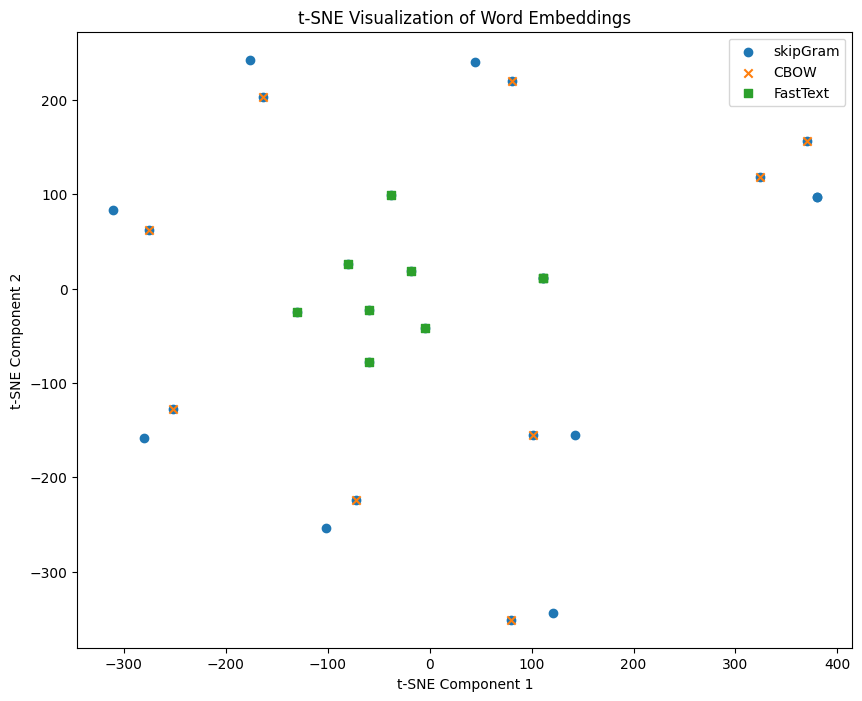

In [61]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Example Arabic tokens
arabic_tokens = [["كان", "الطقس", "حاراً", "في", "الصيف", "و", "بارداً", "في", "الشتاء"]]

# Extract vectors from Word2Vec model
word_vectors_word2vec = [model_skipgram_test.wv[token] for token in arabic_tokens[0]]

# Extract vectors from model_cbow
word_vectors_word2vec2 = [model_cbow_test.wv[token] for token in arabic_tokens[0]]

# Extract vectors from FastText model
word_vectors_fasttext2 = [model_fasttext2.wv[token] for token in arabic_tokens[0]]

# Combine all vectors
all_word_vectors = word_vectors_word2vec + word_vectors_word2vec2 + word_vectors_fasttext2

all_word_vectors = np.array(all_word_vectors)

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
vectors_2d = tsne.fit_transform(all_word_vectors)

# Plot the vectors
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], label='skipGram', marker='o')
plt.scatter(vectors_2d[len(word_vectors_word2vec):len(word_vectors_word2vec)+len(word_vectors_word2vec2), 0],
            vectors_2d[len(word_vectors_word2vec):len(word_vectors_word2vec)+len(word_vectors_word2vec2), 1],
            label='CBOW', marker='x')
plt.scatter(vectors_2d[len(word_vectors_word2vec)+len(word_vectors_word2vec2):, 0],
            vectors_2d[len(word_vectors_word2vec)+len(word_vectors_word2vec2):, 1],
            label='FastText', marker='s')
plt.legend()
plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


* Apply on real data

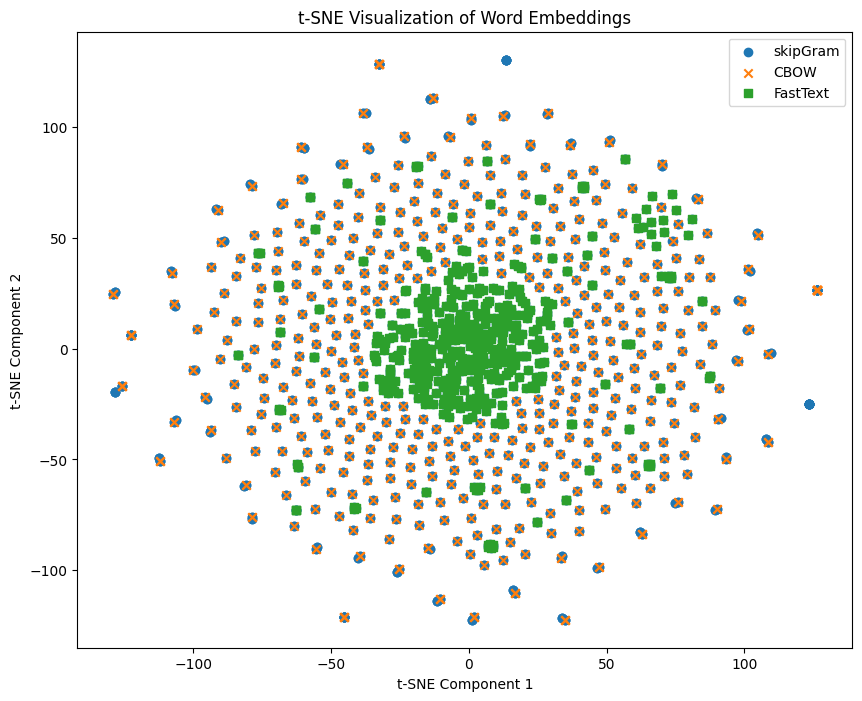

In [64]:
tokens = [all_posts["tokens"][0]]

# Extract vectors from Word2Vec model
word_vectors_skipgram = [model_skipgram.wv[token] for token in tokens[0]]

# Extract vectors from model_cbow
word_vectors_cbow = [model_cbow.wv[token] for token in tokens[0]]

# Extract vectors from FastText model
word_vectors_fasttext = [model_fasttext.wv[token] for token in tokens[0]]

# Combine all vectors
all_word_vectors = word_vectors_skipgram + word_vectors_cbow + word_vectors_fasttext

all_word_vectors = np.array(all_word_vectors)

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
vectors_2d = tsne.fit_transform(all_word_vectors)

# Plot the vectors
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], label='skipGram', marker='o')
plt.scatter(vectors_2d[len(word_vectors_skipgram):len(word_vectors_skipgram)+len(word_vectors_cbow), 0],
            vectors_2d[len(word_vectors_skipgram):len(word_vectors_skipgram)+len(word_vectors_cbow), 1],
            label='CBOW', marker='x')
plt.scatter(vectors_2d[len(word_vectors_skipgram)+len(word_vectors_cbow):, 0],
            vectors_2d[len(word_vectors_skipgram)+len(word_vectors_cbow):, 1],
            label='FastText', marker='s')
plt.legend()
plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## synthesis :
----------------------------
**Part 1: Rule-Based NLP and Regex:**
- I learned how to use regular expressions (regex) to extract structured information from unstructured text.
- Specifically, I applied regex to parse a text containing information about purchased items and their prices to generate a bill.
- This part of the lab familiarized me with the concept of rule-based NLP, where predefined rules are used to process and extract information from text data.

**Part 2: Word Embedding:**
- I explored various word embedding techniques, which are essential for converting textual data into numerical vectors that can be processed by machine learning models.
- Specifically, I applied:
  1. One hot encoding, bag of words, and TF-IDF techniques on the data vectors collected during this lab. These techniques represent each word or token in the dataset as a numerical vector, capturing its presence or frequency in the document.
  2. Word2Vec (both Skip Gram and CBOW), GloVe, and FastText approaches on the same dataset. These advanced word embedding models capture semantic relationships between words by learning distributed representations based on their context in a large corpus of text data.
- Additionally, I visualized the encoded or vectorized vectors using the t-SNE algorithm, allowing me to compare the effectiveness of different word embedding techniques.
- Through this part of the lab, I gained insights into the strengths and weaknesses of various word embedding techniques and learned how to evaluate their performance based on factors such as semantic similarity and suitability for downstream NLP tasks.

Overall, this lab provided a comprehensive understanding of both rule-based NLP using regex and advanced word embedding techniques, empowering you to effectively process and analyze textual data for various NLP applications.